### Практика - Пример на K-Means

#### Задача

- Загрузите набор данных Iris (from sklearn.datasets import load_iris).
- Примените к нему алгоритм K-Means с разным количеством кластеров (k).
- Визуализируйте результаты и определите оптимальное значение k.
```
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()
```

#### Решение

k = 3


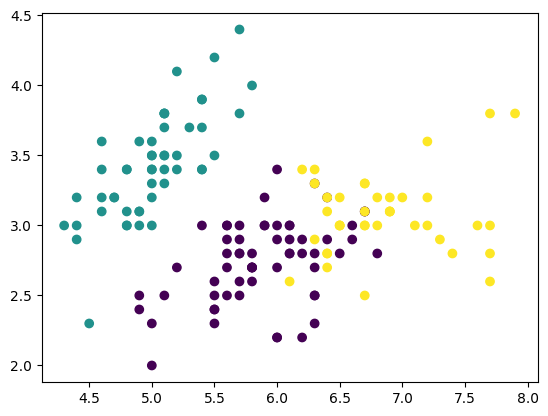

k = 5


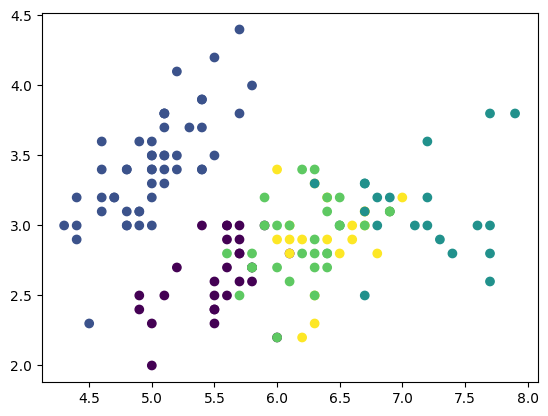

k = 7


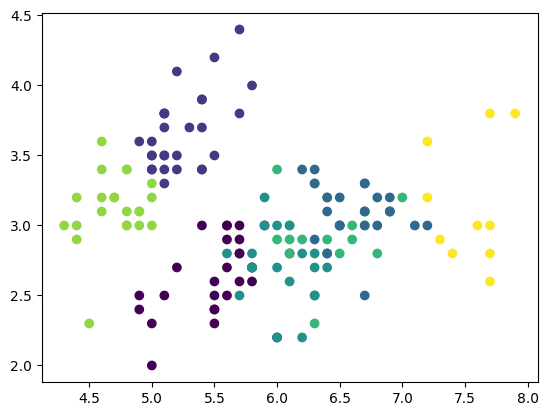

k = 9


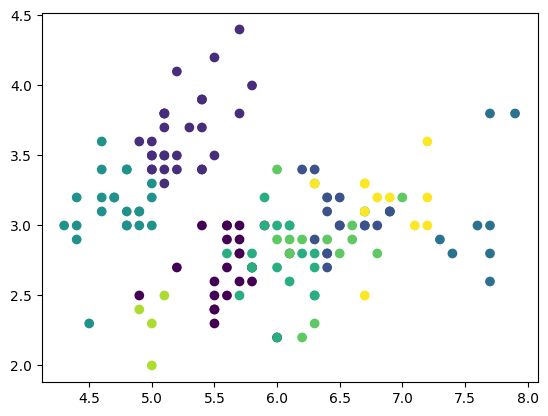

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

for i in [3,5,7,9]:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    print(f'k = {i}')
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    plt.show()
#Лучше всего делит на три кластера, k = 3

### Практика - Пример на PCA 

#### Задача

- Загрузите набор данных MNIST с изображениями рукописных цифр.
- Примените PCA для понижения размерности до 2-х компонент.
- Визуализируйте результаты и оцените, насколько хорошо алгоритм сохранил структуру данных.
```
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='viridis')
plt.show()
```

#### Решение

In [3]:
#!pip install tensorflow
#!pip install cvxopt
#!pip install idx2numpy

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


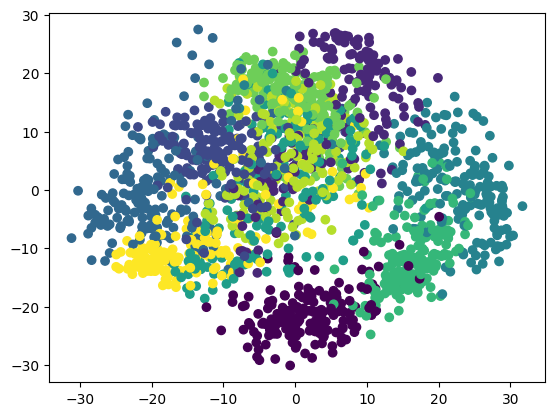

In [17]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
print(X.shape)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='viridis')
plt.show()


In [19]:
from tensorflow.keras.datasets import mnist
(Xtr, ytr), (Xts, yts) = mnist.load_data()
Xtr.shape

(60000, 28, 28)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


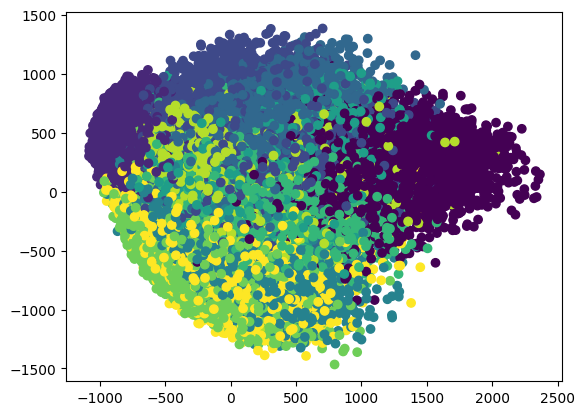

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

(Xtr, ytr), (Xts, yts) = mnist.load_data()
pca = PCA(n_components=3)
Xtr = np.reshape(Xtr,(60000,784))
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ytr, cmap='viridis')
plt.show()

### Практика - Пример на Surprise (библиотека для рекомендательных систем)

#### Задача

- Загрузите набор данных MovieLens (https://grouplens.org/datasets/movielens/).
- Реализуйте простую рекомендательную систему с использованием коллаборативной фильтрации.
- Оцените качество рекомендаций на тестовой выборке.

```
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Пример данных (оценки фильмов)
ratings_dict = {'itemID': [1, 1, 1, 2, 2],
                'userID': [1, 2, 3, 3, 4],
                'rating': [5, 4, 3, 3, 1]}

df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
```

#### Решение

In [24]:
from surprise import Dataset, Reader,accuracy
import surprise

data = Dataset.load_builtin('ml-100k')

#Определение того как данные хранятся в файле
reader = Reader(rating_scale=(1, 5))

# Создание модели SVD
model = surprise.prediction_algorithms.co_clustering.CoClustering()

#Создание тренировочного датасета
trainset = data.build_full_trainset()

# Обучение модели на данных
model.fit(trainset)

#Создание тестового датасета
testset = trainset.build_testset()

# Получение прогнозов модели
predictions = model.test(testset)

# Расчет MAE и RMSE
mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

MAE:  0.7115
RMSE: 0.9092


In [25]:
#Кросс-валидация
from surprise.model_selection import cross_validate
results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9643  0.9688  0.9684  0.9653  0.9666  0.9667  0.0017  
MAE (testset)     0.7585  0.7566  0.7580  0.7538  0.7583  0.7570  0.0018  
Fit time          0.83    0.91    0.72    2.10    0.71    1.05    0.53    
Test time         0.05    0.12    0.05    0.05    0.12    0.08    0.03    


In [26]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split
import surprise

# Разделение данных на обучающий и тестовый наборы
trainset, testset = train_test_split(data, test_size=0.2)

# Создание модели SVD
model = surprise.prediction_algorithms.co_clustering.CoClustering()

# Обучение модели на обучающем наборе
model.fit(trainset)

# Получение прогнозов модели на тестовом наборе
predictions = model.test(testset)

# Расчет MAE и RMSE
mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE:  0.7554
RMSE: 0.9647
MAE: 0.7553512575606569
RMSE: 0.964667650296574


### Практика - Пример на Prophet (библиотека Facebook для прогнозирования временных рядов)

#### Задача

- Найдите набор данных с временным рядом (например, данные о продажах, температуре, курсе валют).
- Визуализируйте данные и определите наличие тренда, сезонности.

```
from prophet import Prophet
import pandas as pd

# Пример данных (число пассажиров авиакомпании)
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
```

#### Решение

In [2]:
!pip install prophet

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ----------- ---------------------------- 3.9/13.3 MB 26.0 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 36.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/791.2 kB ? eta -:--:--
   --------------------------------------- 791.2/791.2 kB 33.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


17:53:50 - cmdstanpy - INFO - Chain [1] start processing
17:53:50 - cmdstanpy - INFO - Chain [1] done processing


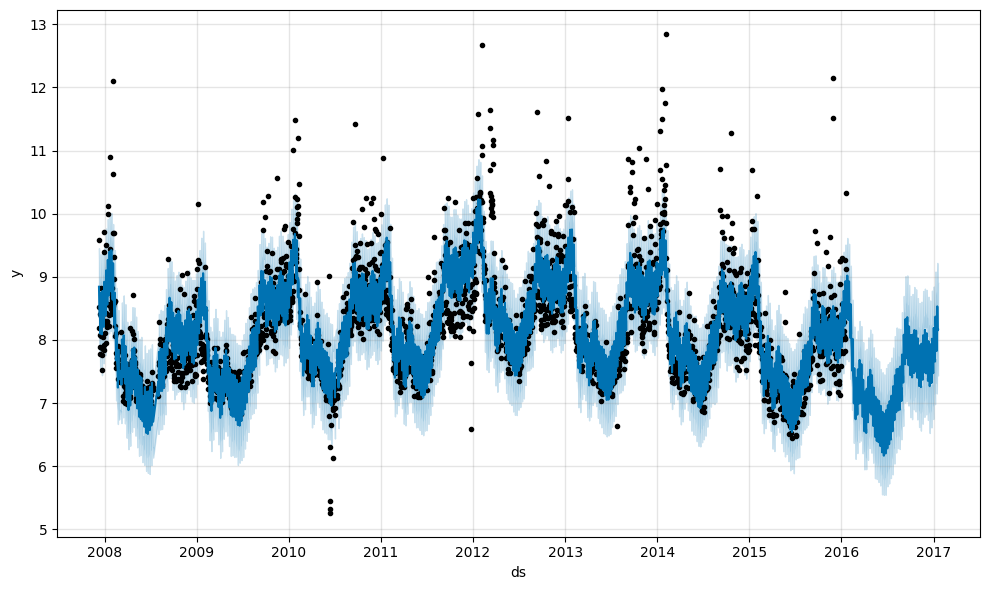

In [26]:
from prophet import Prophet
import pandas as pd

# Пример данных (число пассажиров авиакомпании)
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)


17:53:32 - cmdstanpy - INFO - Chain [1] start processing
17:53:37 - cmdstanpy - INFO - Chain [1] done processing


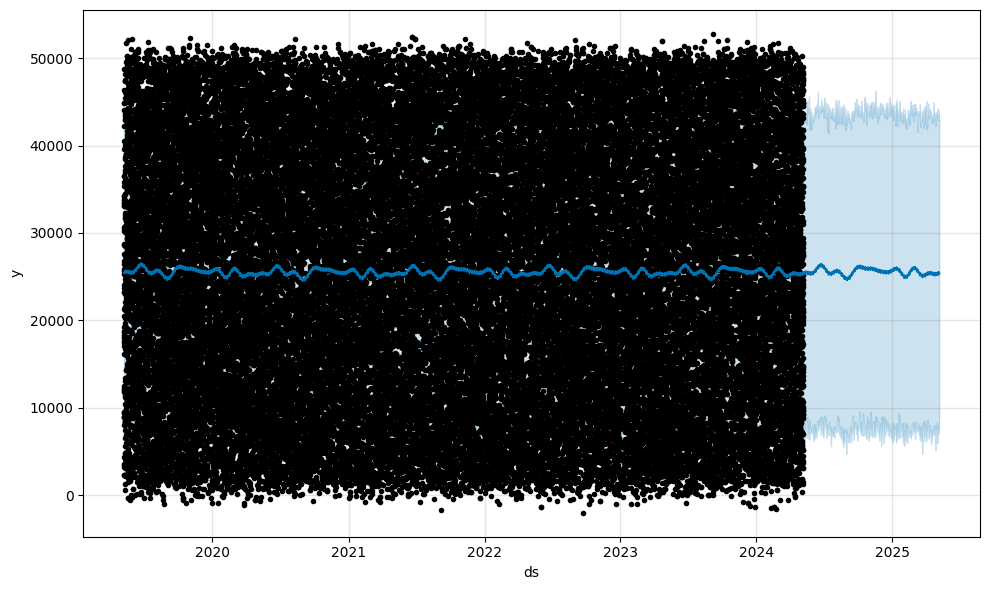

In [25]:
from prophet import Prophet
import pandas as pd

#Загружаем данные
data_med = pd.read_csv('healthcare_dataset.csv')

#Разбираемся с типами данных
data_med = data_med.astype({'Date of Admission':'datetime64[ns]', 'Discharge Date':'datetime64[ns]'})
#data_med

#data_med.columns = ['Date of Admission', 'Billing Amount']

df = data_med.drop(['Name','Age','Gender','Blood Type','Medical Condition','Doctor','Hospital',
                    'Insurance Provider','Room Number','Admission Type','Discharge Date','Medication','Test Results'],axis=1)

df.rename(columns={'Date of Admission': 'ds', 'Billing Amount': 'y'}, inplace=True)
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)

### Практика - Простая модель прогнозирования (ARIMA) 

#### Задача

```
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Загрузка данных о количестве пассажиров авиакомпании (классический пример)
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
data.index = pd.to_datetime(data.index)

# Разделение на обучающую и тестовую выборки
train_data = data[:-12]
test_data = data[-12:]

# Построение модели ARIMA(5,1,0)
# (p=5, d=1, q=0 - параметры модели, подбираются экспериментально)
model = ARIMA(train_data['Passengers'], order=(5,1,0))
model_fit = model.fit()

# Предсказание на тестовой выборке
predictions = model_fit.predict(start=len(test_data), end=len(data)-1) # test_data

# Оценка точности модели
mae = mean_absolute_error(test_data['Passengers'], predictions)
rmse = mean_squared_error(test_data['Passengers'], predictions, squared=False)

# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Визуализация
plt.plot(test_data['Passengers'], label='Фактические значения')
plt.plot(predictions, label='Прогноз')
plt.legend()
plt.show()
```


#### Пояснение

- Загрузка и подготовка данных:
   - Загружаем данные о количестве пассажиров.
   - Преобразуем индекс в формат datetime.
   - Разделяем данные на обучающую (все кроме последних 12 месяцев) и тестовую (последние 12 месяцев) выборки.
- Создание и обучение модели:
   - Создаем модель ARIMA с параметрами order=(5,1,0).
     - p=5:  используем 5 лаговых значений ряда (авторегрессия).
     - d=1:  дифференцируем ряд 1 раз для обеспечения стационарности.
     - q=0:  не используем скользящее среднее.
   - Обучаем модель на тренировочных данных.
- Прогнозирование:
   - Предсказываем значения на тестовой выборке.
-  Оценка точности:
   - Рассчитываем MAE и RMSE, чтобы оценить, насколько точны прогнозы модели.
-  Визуализация:
   - Строим график фактических и предсказанных значений для наглядности.

**Важно**:
- Выбор параметров p, d, q для модели ARIMA  важен и может существенно влиять на точность прогноза. Существуют методы для автоматического подбора этих параметров.
- В реальных задачах может потребоваться дополнительная предобработка данных, анализ сезонности и другие действия для повышения точности модели.

#### Решение

In [28]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----------------------------- ---------- 7.3/9.8 MB 41.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 38.2 MB/s eta 0:00:00


In [31]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Загрузка данных о количестве пассажиров авиакомпании (классический пример)
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0)
data.index = pd.to_datetime(data.index)

# Разделение на обучающую и тестовую выборки
train_data = data[:-12]
test_data = data[-12:]

# Построение модели ARIMA(5,1,0)
# (p=5, d=1, q=0 - параметры модели, подбираются экспериментально)
model = ARIMA(train_data['Passengers'], order=(5,1,0))
model_fit = model.fit()

# Предсказание на тестовой выборке
predictions = model_fit.predict(start=len(test_data), end=len(data)-1) # test_data

C:\Users\Viki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Viki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Viki\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
# Оценка точности модели
mae = mean_absolute_error(test_data['Passengers'], predictions[:12])
rmse = mean_squared_error(test_data['Passengers'], predictions[:12])

# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 338.86
RMSE: 118729.66


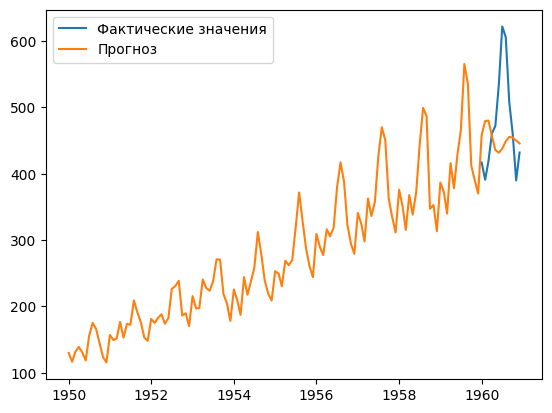

In [32]:
# Визуализация
plt.plot(test_data['Passengers'], label='Фактические значения')
plt.plot(predictions, label='Прогноз')
plt.legend()
plt.show()